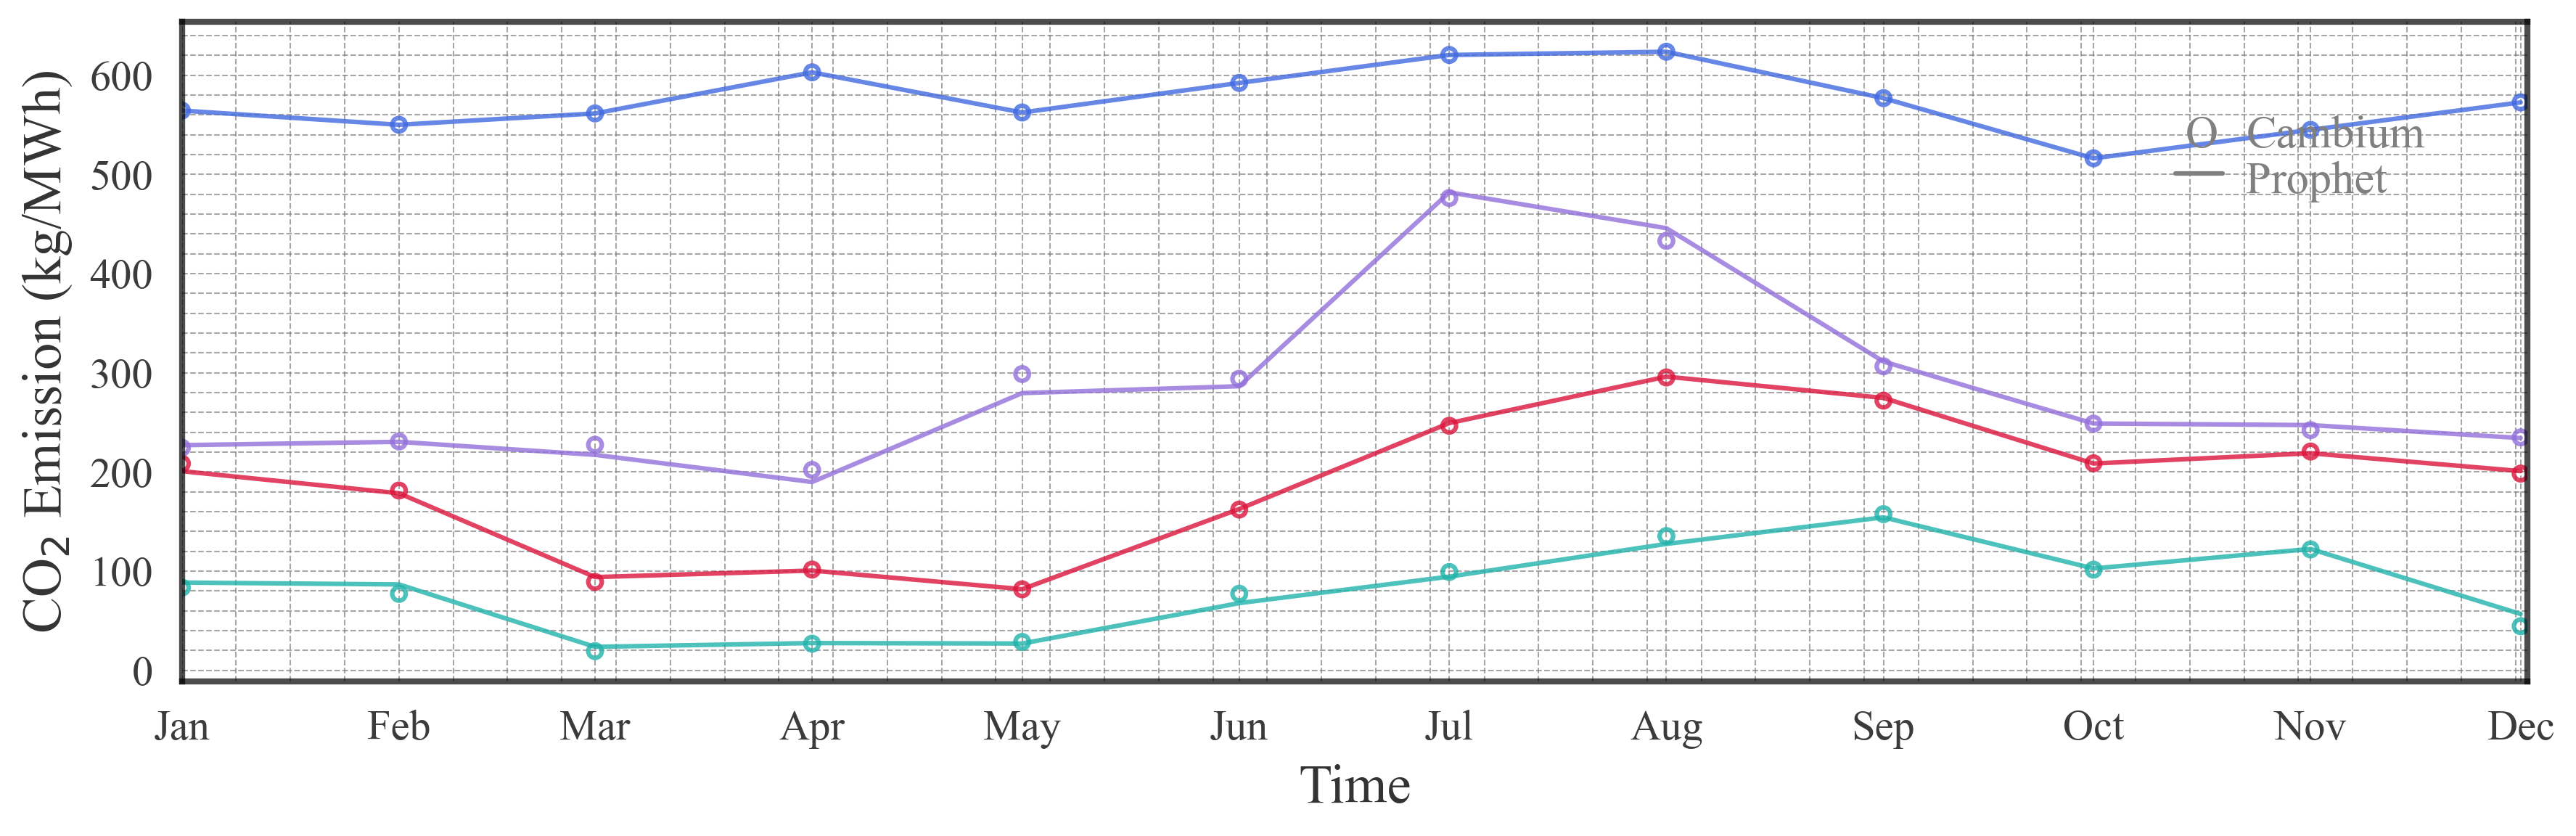

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib.ticker import AutoMinorLocator, MaxNLocator

# Define file paths for each state's CH4 emissions data
file_paths = {
    'California': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CO2\california\harmonicmean\results\co2_cal_forecasted_results.xlsx',
    'Georgia': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CO2\georgia\harmonicmean\results\forecasted_results_new.xlsx',
    'New York': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CO2\newyork\harmonicmean\results\co2_new_forecasted_results.xlsx',
    'Washington': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CO2\washington\harmonicmean\results\co2_was_forecasted_results.xlsx'
}

# Define the output path for saving the graphs
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'

Scenario = "Scenario 1"
Emission = "CO$_2$ Emission (kg/MWh)"  # Adjusted to make "2" subscript
year_of_interest = 2025  # Specify the year of interest
figure = "0_a_1_new"

# Define colors for each state using HUSL palette
colors = ['crimson', 'royalblue', 'mediumpurple', 'lightseagreen']

# Set the plot style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Create the main plot
fig, ax = plt.subplots(figsize=(12, 4), dpi=300)
scatter_lines = []

# Iterate over each state and plot the data
for (state, file_path), color in zip(file_paths.items(), colors):
    # Read the actual and forecasted data
    actual_data = pd.read_excel(file_path, sheet_name='hm_actual_Mid-case_CO2_Emission')
    forecast_data = pd.read_excel(file_path, sheet_name='hm_forecast_Mid-case_CO2_Emissi')
    
    # Filter data for the specified year
    actual_data = actual_data[(actual_data['ds'].dt.year == year_of_interest)]
    forecast_data = forecast_data[(forecast_data['ds'].dt.year == year_of_interest)]
    
    # Plot actual emissions with hollow markers
    scatter = ax.scatter(actual_data['ds'], actual_data['y'], marker='o', facecolors='none', edgecolors=color, alpha=0.8, s=20, linewidth=1.5)
    
    # Plot predicted emissions with a line only
    line, = ax.plot(forecast_data['ds'], forecast_data['yhat'], linestyle='-', alpha=0.8, color=color, linewidth=1.5)
    
    scatter_lines.append((scatter, line, state))

# Labels and title
ax.set_xlabel('Time', labelpad=5, fontsize=18, color='black', alpha=0.8)
ax.set_ylabel(Emission, labelpad=5, fontsize=18, color='black', alpha=0.8)

ax.set_xlim([pd.Timestamp(f'{year_of_interest}-01-01'), pd.Timestamp(f'{year_of_interest}-12-31')])

start_date = pd.Timestamp(f'{year_of_interest}-01-01')
end_date = pd.Timestamp(f'{year_of_interest}-12-31')
ax.set_xlim(start_date, end_date)

# Set x-axis ticks to show each month
months = [pd.Timestamp(f'{year_of_interest}-{month:02d}-01') for month in range(1, 13)]
ax.set_xticks(months)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set x-axis limit to the specified year from January to December
ax.set_xlim(right=pd.Timestamp(f'{year_of_interest}-12-01') + pd.Timedelta(days=1))

for label in ax.get_xticklabels():
    label.set_alpha(0.9)
    label.set_fontsize(14)
for label in ax.get_yticklabels():
    label.set_alpha(0.9)
    label.set_fontsize(14)

# Add annotation with aligned text for MOVES 4.0 and FNN Model

line = Line2D([0.85, 0.87], [0.77, 0.77], transform=ax.transAxes, color='gray', linewidth=1.5)
ax.add_line(line)
ax.annotate('O', xy=(0.861, 0.81), xycoords='axes fraction', fontsize=15, color='gray', ha='center')
ax.annotate('Cambium', xy=(0.88, 0.81), xycoords='axes fraction', fontsize=15, color='gray', ha='left')
ax.annotate('Prophet', xy=(0.88, 0.74), xycoords='axes fraction', fontsize=15, color='gray', ha='left')

# Grid and legend
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.7)
    spine.set_linewidth(2)

# Save the main plot
plt.savefig(f'{output_path}/{figure}.svg', format='svg')

# Show the main plot
plt.show()
